In [2]:
from pathlib import Path
from nbtschematic import SchematicFile
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [3]:
SCHEMATICS_DIR = Path("schematics/")
METADATA_FILE = Path("data.csv")

In [4]:
p = SCHEMATICS_DIR.glob("*.schematic")
files = [str(x) for x in p if x.is_file()]
# ", ".join(files)

## Reading data

In [5]:
df = pd.read_csv(METADATA_FILE)
df["Size"] = pd.Categorical(df["Size"], categories=["Small", "Medium", "Large", "Huge"], ordered=True)
df.head()

,Rating,Category,Theme,Size,File Format,Submitted by,Posted on,Download(s),ID,Name,Path,URL,Page,Y,Z,X
0,4.3,Houses And Shops,Modern,Medium,.schematic,splinteredvoyagers,"February 2nd, 2013 05:23 PM EST",101953,235,LARGE 3 story Mansion [64x64],schematics/235.schematic,https://www.minecraft-schematics.com/schematic...,0,69,62,62
1,4.4,Temples,Modern,Large,.schematic,seventy6,"February 14th, 2013 11:49 AM EST",85689,270,Grand Hotel,schematics/270.schematic,https://www.minecraft-schematics.com/schematic...,0,85,160,141
2,4.0,Castles,Medieval,Small,.schematic,splinteredvoyagers,"January 23rd, 2013 05:01 PM EST",74112,218,Ender Castle,schematics/218.schematic,https://www.minecraft-schematics.com/schematic...,0,97,62,62
3,4.2,Houses And Shops,Modern,Medium,.schematic,jar9,"January 12th, 2014 01:34 AM EST",36241,2339,modern house #2,schematics/2339.schematic,https://www.minecraft-schematics.com/schematic...,0,30,45,53
4,4.3,Towns,Medieval,Large,.schematic,5rrrrr,"May 7th, 2014 06:47 PM EST",34293,3177,Village in a Tree,schematics/3177.schematic,https://www.minecraft-schematics.com/schematic...,0,148,118,126


## EDA

### Investigating the size of schematics

In [6]:
MAX_SIZE = 256

(0.0, 256.0)

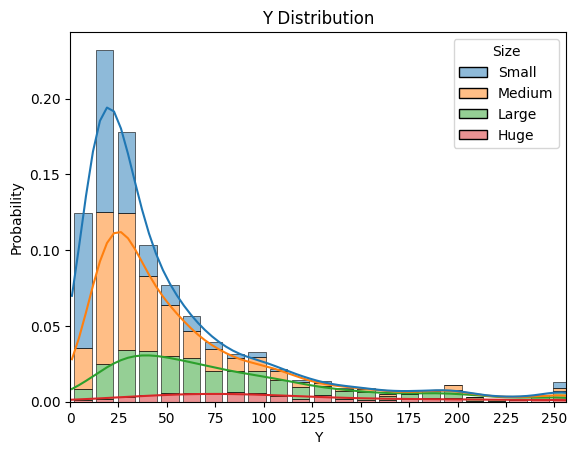

In [7]:
g = sns.histplot(data=df, x="Y", hue="Size", multiple="stack", shrink=0.8, stat="probability", kde="True", bins=64)
g.set_xticks(np.arange(0, MAX_SIZE, 25))
g.set_title("Y Distribution")
plt.xlim(0, MAX_SIZE)

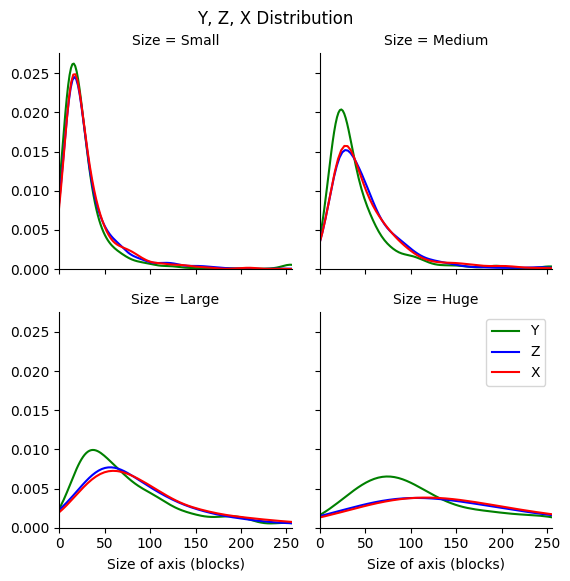

In [8]:
# Distribution of Y, Z, X variables for each size
# Uses a FacetGrid to plot each size on a separate subplot

g = sns.FacetGrid(df, col="Size", col_wrap=2)
g.fig.suptitle("Y, Z, X Distribution", y=0.96)

# Map Y, Z, X for each size
g.map(sns.kdeplot, "Y",  color="g")
g.map(sns.kdeplot, "Z",  color="b")
g.map(sns.kdeplot, "X",  color="r")

for ax in g.axes.flat:
    ax.set_xlim(0, MAX_SIZE)
    ax.set_xticks(np.arange(0, MAX_SIZE, 50))
    ax.set_xlabel("Size of axis (blocks)")
    ax.set_ylabel("")

plt.legend(["Y", "Z", "X"])

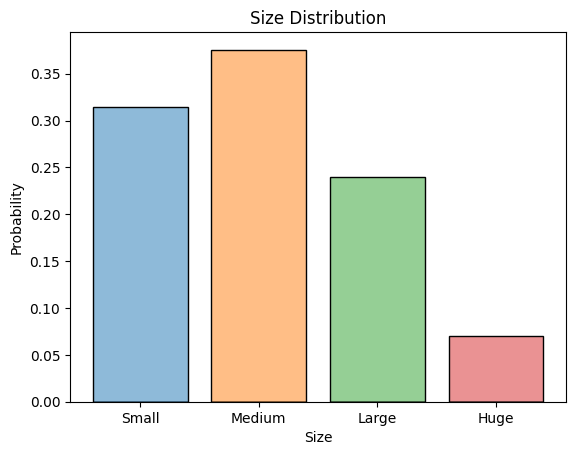

In [9]:
# Distribution of Size 

g = sns.histplot(data=df, x="Size", shrink=0.8, stat="probability", hue="Size")
g.set_title("Size Distribution")
g.legend_.remove()

I arbitrarily decide an input shape (128, 128, 128)

## Getting subset of data

In [10]:
SHAPE = (128, 128, 128)

# get all schematics smaller than the shape

def drop_shape(SHAPE):
    small = df[df["X"] < SHAPE[0]]
    small = small[small["Y"] < SHAPE[1]]
    small = small[small["Z"] < SHAPE[2]]
    print(f"Dropped {len(df) - len(small)} schematics")
    small.head()


SHAPES = [(i, i, i) for i in range(0, 512, 25)]
for shape in SHAPES:
    print(shape, end=" ")
    drop_shape(shape)
drop_shape(SHAPE)

(0, 0, 0) Dropped 3557 schematics
(25, 25, 25) Dropped 2947 schematics
(50, 50, 50) Dropped 1999 schematics
(75, 75, 75) Dropped 1409 schematics
(100, 100, 100) Dropped 1008 schematics
(125, 125, 125) Dropped 742 schematics
(150, 150, 150) Dropped 572 schematics
(175, 175, 175) Dropped 443 schematics
(200, 200, 200) Dropped 331 schematics
(225, 225, 225) Dropped 254 schematics
(250, 250, 250) Dropped 195 schematics
(275, 275, 275) Dropped 124 schematics
(300, 300, 300) Dropped 95 schematics
(325, 325, 325) Dropped 74 schematics
(350, 350, 350) Dropped 54 schematics
(375, 375, 375) Dropped 43 schematics
(400, 400, 400) Dropped 38 schematics
(425, 425, 425) Dropped 33 schematics
(450, 450, 450) Dropped 26 schematics
(475, 475, 475) Dropped 23 schematics
(500, 500, 500) Dropped 23 schematics
Dropped 720 schematics


### Separate data

In [11]:
df_sub = df[df["X"] < SHAPE[0]]
df_sub = df_sub[df_sub["Y"] < SHAPE[1]]
df_sub = df_sub[df_sub["Z"] < SHAPE[2]]
df_sub

,Rating,Category,Theme,Size,File Format,Submitted by,Posted on,Download(s),ID,Name,Path,URL,Page,Y,Z,X
0,4.3,Houses And Shops,Modern,Medium,.schematic,splinteredvoyagers,"February 2nd, 2013 05:23 PM EST",101953,235,LARGE 3 story Mansion [64x64],schematics/235.schematic,https://www.minecraft-schematics.com/schematic...,0,69,62,62
2,4.0,Castles,Medieval,Small,.schematic,splinteredvoyagers,"January 23rd, 2013 05:01 PM EST",74112,218,Ender Castle,schematics/218.schematic,https://www.minecraft-schematics.com/schematic...,0,97,62,62
3,4.2,Houses And Shops,Modern,Medium,.schematic,jar9,"January 12th, 2014 01:34 AM EST",36241,2339,modern house #2,schematics/2339.schematic,https://www.minecraft-schematics.com/schematic...,0,30,45,53
5,4.4,Houses And Shops,Medieval,Medium,.schematic,jar9,"January 18th, 2016 11:48 PM EST",30938,6901,Medieval house,schematics/6901.schematic,https://www.minecraft-schematics.com/schematic...,0,39,35,25
10,4.3,Houses And Shops,Medieval,Medium,.schematic,jar9,"May 19th, 2015 07:55 AM EST",22777,5571,Large Medieval House,schematics/5571.schematic,https://www.minecraft-schematics.com/schematic...,0,51,61,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,4.0,Miscellaneous,Other,Medium,.schematic,Fornalhas,"April 13th, 2019 07:21 AM EST",888,13262,Cactus Farm,schematics/13262.schematic,https://www.minecraft-schematics.com/schematic...,0,24,37,71
3553,3.6,Houses And Shops,Modern,Medium,.schematic,Orzel,"March 19th, 2018 10:48 AM EST",888,11486,Modern house,schematics/11486.schematic,https://www.minecraft-schematics.com/schematic...,0,15,26,28
3554,4.0,Houses And Shops,Modern,Medium,.schematic,lambojoy,"November 21st, 2022 11:42 PM EST",888,18636,Modern house 8,schematics/18636.schematic,https://www.minecraft-schematics.com/schematic...,0,25,51,51
3555,3.8,Arenas,Futurist,Medium,.schematic,Chakyl,"January 23rd, 2013 06:10 PM EST",887,219,[Mob Arena] Huskarl,schematics/219.schematic,https://www.minecraft-schematics.com/schematic...,0,43,58,57


## Analysis of themes

Text(0.5, 1.0, 'Distribution of Themes')

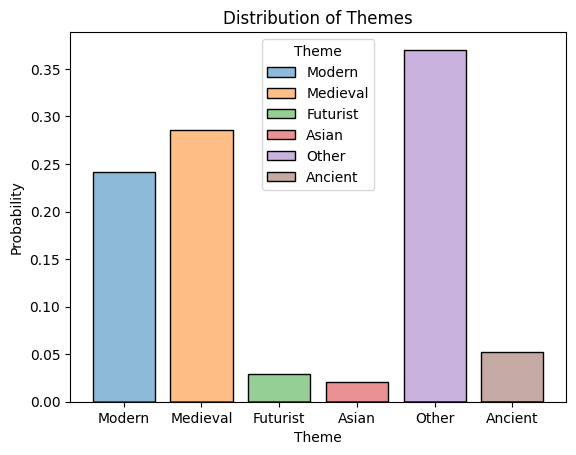

In [12]:
# Distribution of Themes
g = sns.histplot(data=df_sub, x="Theme", shrink=0.8, stat="probability", hue="Theme")
g.set_title("Distribution of Themes")

Text(0.5, 1.0, 'Distribution of Ratings for each Theme')

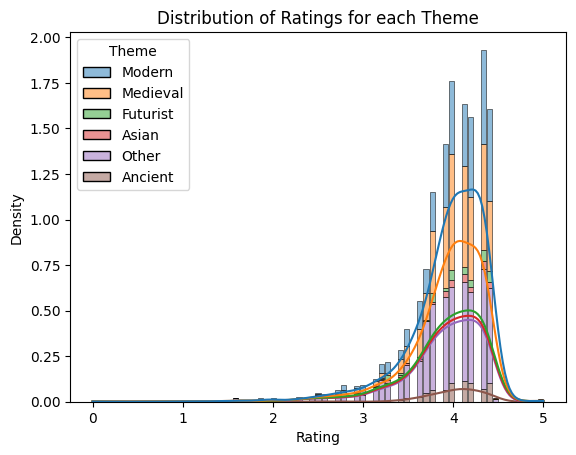

In [13]:
# Distribution of Ratings for each Theme
g = sns.histplot(data=df_sub, x="Rating", hue="Theme", shrink=0.8, stat="density", multiple="stack", kde="True")
g.set_title("Distribution of Ratings for each Theme")

(0.0, 1853.0)

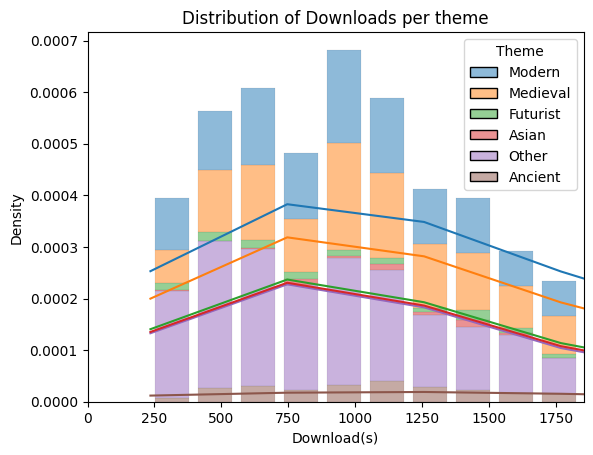

In [14]:
# Distribution of Downloads per theme
g = sns.histplot(data=df_sub, x="Download(s)", hue="Theme", shrink=0.8, stat="density", multiple="stack", kde="True")
g.set_title("Distribution of Downloads per theme")
# Limit the x axis to IQR
g.set_xlim(0, df_sub["Download(s)"].quantile(0.75))

## Analysis of Category

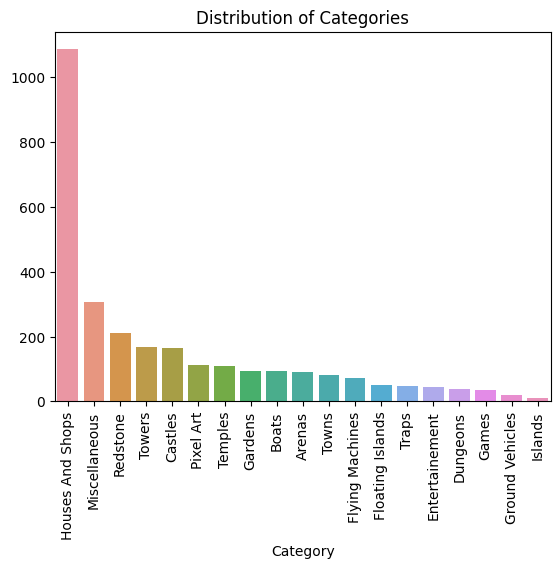

In [15]:
# Distribution of Categories
v_c = df_sub.value_counts("Category")
g = sns.barplot(x=v_c.index, y=v_c.values)
g.set_title("Distribution of Categories")
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
# One hot encode the categories
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(df_sub[["Category"]])
enc.categories_


[array(['Arenas', 'Boats', 'Castles', 'Dungeons', 'Entertainement',
        'Floating Islands', 'Flying Machines', 'Games', 'Gardens',
        'Ground Vehicles', 'Houses And Shops', 'Islands', 'Miscellaneous',
        'Pixel Art', 'Redstone', 'Temples', 'Towers', 'Towns', 'Traps'],
       dtype=object)]

In [27]:
oe = enc.transform(df_sub[["Category"]]).toarray()
oe.shape
oe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])